<h2> Modeling - Construct models to predict and forcast</h2>

# Explore for initial models
It stands to reason that size of the home should predict price but what else could improve our prediction and are there any other features that might improve our prediction. Let's explore the following:
* What single feature is the best predictor of home price?
* Are there any groups of features that increase this accuracy of this prediction?
* Are there any other interesting associations?

In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
plt.style.use('seaborn-colorblind')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
# Read in cleaned Kings County file 
df = pd.read_csv("cleaned_kings.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,7129300520,01/01/1970,221900.0,3,1.00,1180,5650,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,1,6414100192,01/01/1970,538000.0,3,2.25,2570,7242,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,2,5631500400,01/01/1970,180000.0,2,1.00,770,10000,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,3,3,2487200875,01/01/1970,604000.0,4,3.00,1960,5000,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,4,4,1954400510,01/01/1970,510000.0,3,2.00,1680,8080,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Searching for the Best Single Predictor
What single feature predicts price the best? 

In [3]:
# Interesting features
features = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','grade',
            'sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]
features.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,1690,7639


### Split Features into Categorical and Continuous

In [4]:
# Our initial target will be price
price = df[['price']]

# Continuous features will remain features
features = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot', 'sqft_above',
               'sqft_basement','sqft_living15','sqft_lot15']]

# Categorical features
cat_features = df[['floors','view','condition','grade','yr_built','yr_renovated']]
cat_features.head()

,floors,view,condition,grade,yr_built,yr_renovated
0,1.0,0,3,7,1955,0
1,2.0,0,3,7,1951,1991
2,1.0,0,3,6,1933,0
3,1.0,0,5,7,1965,0
4,1.0,0,3,8,1987,0


### Price vs Each Feature

In [5]:
# Remove 1st two columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,01/01/1970,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,01/01/1970,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,01/01/1970,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,01/01/1970,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,01/01/1970,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Create the OLS model by looping through each feature and create a summary table
summaries = []
for feature in features:
    d = {}
    formula_str = 'price ~ ' + str(feature)
    res = ols(formula=formula_str, data=features).fit()
    # Make a summary chart
    d['feature'] = feature
    d['jb'],d['p'], d['sk'], d['kurt'] = sms.jarque_bera(res.resid)
    d['r2'] = res.rsquared
    summaries.append(d)
    res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.364e+39
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:43:49   Log-Likelihood:             5.6308e+05
No. Observations:               21420   AIC:                        -1.126e+06
Df Residuals:                   21418   BIC:                        -1.126e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.273e-11   1.13e-14  -1127.931      0.000   -1.28e-11   -1.27e-11
price          1.0000   1.72e-20    5.8e+19      0.000       1.000       1.000
==============================================================================
Omnibus:                    41361.166   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         52796353.574
Skew:                          15.595   Prob(JB):                         0.00
Kurtosis:                     244.211   Cond. No.                     1.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2391.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:43:49   Log-Likelihood:            -3.0375e+05
No. Observations:               21420   AIC:                         6.075e+05
Df Residuals:                   21418   BIC:                         6.075e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.068e+05   9209.982     11.598      0.000    8.88e+04    1.25e+05
bedrooms     1.29e+05   2637.951     48.900      0.000    1.24e+05    1.34e+05
==============================================================================
Omnibus:                    18810.471   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1169819.628
Skew:                           3.955   Prob(JB):                         0.00
Kurtosis:                      38.329   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8159.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:43:49   Log-Likelihood:            -3.0143e+05
No. Observations:               21420   AIC:                         6.029e+05
Df Residuals:                   21418   BIC:                         6.029e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9866.1762   6265.487      1.575      0.115   -2414.647    2.21e+04
bathrooms   2.511e+05   2780.231     90.326      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17137.086   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           880147.149
Skew:                           3.460   Prob(JB):                         0.00
Kurtosis:                      33.631   Cond. No.                         7.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.073e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:43:49   Log-Likelihood:            -2.9763e+05
No. Observations:               21420   AIC:                         5.953e+05
Df Residuals:                   21418   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.255e+04   4436.470     -9.591      0.000   -5.12e+04   -3.39e+04
sqft_living   280.5436      1.949    143.972      0.000     276.724     284.363
==============================================================================
Omnibus:                    14710.422   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           541541.173
Skew:                           2.827   Prob(JB):                         0.00
Kurtosis:                      26.975   Cond. No.                     5.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     170.2
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           9.45e-39
Time:                        11:43:49   Log-Likelihood:            -3.0480e+05
No. Observations:               21420   AIC:                         6.096e+05
Df Residuals:                   21418   BIC:                         6.096e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     5.3e+05   2662.333    199.064      0.000    5.25e+05    5.35e+05
sqft_lot       0.7858      0.060     13.046      0.000       0.668       0.904
==============================================================================
Omnibus:                    19019.378   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1146871.980
Skew:                           4.042   Prob(JB):                         0.00
Kurtosis:                      37.924   Cond. No.                     4.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                 1.233e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:43:49   Log-Likelihood:            -3.0001e+05
No. Observations:               21420   AIC:                         6.000e+05
Df Residuals:                   21418   BIC:                         6.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.168e+04   4765.070     12.943      0.000    5.23e+04     7.1e+04
sqft_above   268.0851      2.414    111.034      0.000     263.353     272.818
==============================================================================
Omnibus:                    16394.462   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           727496.131
Skew:                           3.275   Prob(JB):                         0.00
Kurtosis:                      30.789   Cond. No.                     4.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2465.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:43:49   Log-Likelihood:            -3.0372e+05
No. Observations:               21420   AIC:                         6.074e+05
Df Residuals:                   21418   BIC:                         6.075e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.651e+05   2836.398    163.985      0.000     4.6e+05    4.71e+05
sqft_basement   268.3621      5.405     49.649      0.000     257.767     278.957
==============================================================================
Omnibus:                    17824.260   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           883833.135
Skew:                           3.703   Prob(JB):                         0.00
Kurtosis:                      33.585   Cond. No.                         626.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.107e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:43:49   Log-Likelihood:            -3.0042e+05
No. Observations:               21420   AIC:                         6.008e+05
Df Residuals:                   21418   BIC:                         6.009e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.051e+04   6256.005    -12.870      0.000   -9.28e+04   -6.83e+04
sqft_living15   313.0052      2.974    105.231      0.000     307.175     318.835
==============================================================================
Omnibus:                    20003.024   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1899043.797
Skew:                           4.216   Prob(JB):                         0.00
Kurtosis:                      48.351   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     145.2
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           2.55e-33
Time:                        11:43:49   Log-Likelihood:            -3.0481e+05
No. Observations:               21420   AIC:                         6.096e+05
Df Residuals:                   21418   BIC:                         6.096e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.278e+05   2762.689    191.036      0.000    5.22e+05    5.33e+05
sqft_lot15     1.1028      0.092     12.048      0.000       0.923       1.282
==============================================================================
Omnibus:                    19006.157   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1141706.225
Skew:                           4.038   Prob(JB):                         0.00
Kurtosis:                      37.842   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Summary Chart

In [7]:
summaries_df = pd.DataFrame(summaries)
summaries_df.head()

,feature,jb,p,sk,kurt,r2
0,price,5.279635e+07,0.0,15.595223,244.210975,1.000000
1,bedrooms,1.169820e+06,0.0,3.954829,38.329302,0.100432
2,bathrooms,8.801471e+05,0.0,3.459663,33.631392,0.275851
3,sqft_living,5.415412e+05,0.0,2.826897,26.975059,0.491814
4,sqft_lot,1.146872e+06,0.0,4.041653,37.923786,0.007883


#### Regression Observations
* sqft_living has the best rsquared value  



In [8]:
# regression for categorical variabes
summaries = []
for feature in cat_features:
    formula_str = 'price ~ ' + str(feature)
    mod = ols(formula=formula_str, data=df)
    res = mod.fit()
     # Make a summary chart
    d['feature'] = feature
    d['jb'],d['p'], d['sk'], d['kurt'] = sms.jarque_bera(res.resid)
    d['r2'] = res.rsquared
    summaries.append(d)
    res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1489.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          5.00e-315
Time:                        11:43:49   Log-Likelihood:            -3.0416e+05
No. Observations:               21420   AIC:                         6.083e+05
Df Residuals:                   21418   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.823e+05   7151.702     39.469      0.000    2.68e+05    2.96e+05
floors      1.735e+05   4496.552     38.590      0.000    1.65e+05    1.82e+05
==============================================================================
Omnibus:                    19230.186   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1252656.246
Skew:                           4.086   Prob(JB):                         0.00
Kurtosis:                      39.562   Cond. No.                         6.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     3907.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:43:49   Log-Likelihood:            -3.0309e+05
No. Observations:               21420   AIC:                         6.062e+05
Df Residuals:                   21418   BIC:                         6.062e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.977e+05   2415.114    206.089      0.000    4.93e+05    5.02e+05
view        1.886e+05   3017.440     62.508      0.000    1.83e+05    1.95e+05
==============================================================================
Omnibus:                    17969.517   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1076234.460
Skew:                           3.678   Prob(JB):                         0.00
Kurtosis:                      36.937   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     25.11
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           5.46e-07
Time:                        11:43:49   Log-Likelihood:            -3.0487e+05
No. Observations:               21420   AIC:                         6.097e+05
Df Residuals:                   21418   BIC:                         6.098e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.759e+05   1.34e+04     35.493      0.000     4.5e+05    5.02e+05
condition   1.935e+04   3861.392      5.011      0.000    1.18e+04    2.69e+04
==============================================================================
Omnibus:                    18996.187   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1135984.029
Skew:                           4.037   Prob(JB):                         0.00
Kurtosis:                      37.751   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.715e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:43:49   Log-Likelihood:            -2.9858e+05
No. Observations:               21420   AIC:                         5.972e+05
Df Residuals:                   21418   BIC:                         5.972e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.24e+04    -85.682      0.000   -1.08e+06   -1.04e+06
grade       2.091e+05   1596.961    130.958      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19724.940   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2026863.651
Skew:                           4.084   Prob(JB):                         0.00
Kurtosis:                      49.950   Cond. No.                         52.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     55.88
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           8.00e-14
Time:                        11:43:49   Log-Likelihood:            -3.0485e+05
No. Observations:               21420   AIC:                         6.097e+05
Df Residuals:                   21418   BIC:                         6.097e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.157e+05   1.68e+05     -4.254      0.000   -1.05e+06   -3.86e+05
yr_built     638.0255     85.352      7.475      0.000     470.730     805.321
==============================================================================
Omnibus:                    19015.316   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1140974.246
Skew:                           4.042   Prob(JB):                         0.00
Kurtosis:                      37.829   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     303.9
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           1.37e-67
Time:                        11:43:49   Log-Likelihood:            -3.0473e+05
No. Observations:               21420   AIC:                         6.095e+05
Df Residuals:                   21418   BIC:                         6.095e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.336e+05   2538.047    210.255      0.000    5.29e+05    5.39e+05
yr_renovated   119.2533      6.841     17.432      0.000     105.845     132.662
==============================================================================
Omnibus:                    18789.117   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1076568.628
Skew:                           3.980   Prob(JB):                         0.00
Kurtosis:                      36.806   Cond. No.                         378.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Price versus sqft_living  without outliers

In [9]:
summaries = pd.DataFrame(summaries)
summaries

,feature,jb,p,sk,kurt,r2
0,yr_renovated,1.076569e+06,0.0,3.980416,36.806279,0.01399
1,yr_renovated,1.076569e+06,0.0,3.980416,36.806279,0.01399
2,yr_renovated,1.076569e+06,0.0,3.980416,36.806279,0.01399
3,yr_renovated,1.076569e+06,0.0,3.980416,36.806279,0.01399
4,yr_renovated,1.076569e+06,0.0,3.980416,36.806279,0.01399
5,yr_renovated,1.076569e+06,0.0,3.980416,36.806279,0.01399


### Sqft Living: Find and remove outliers for better predictive values

In [10]:
# Calculate the sqft_living limit for outliers using 1.5 * IQR + Q3
Q1 = features['sqft_living'].quantile(0.25)
Q3 = features['sqft_living'].quantile(0.75)
IQR = Q3 - Q1
limit = 1.5 * IQR + Q3
limit

4230.0

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2170,400,1690,7639


Text(0.5, 1.0, 'Sqft living (without upper outliers)')

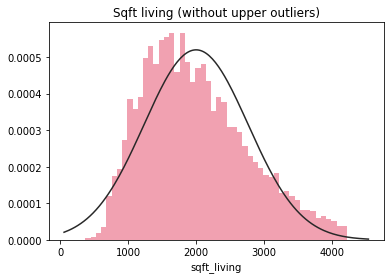

20841 21420


In [11]:
# Remove upper outliers from sqft_living and create histogram again
norm_sqft_living = features[features['sqft_living'] < limit]
norm_sqft_living.head(2)

# Histogram (distplot)
sns.distplot(norm_sqft_living['sqft_living'], color='crimson', label=norm_sqft_living, fit=norm, kde=False)
plt.title('Sqft living (without upper outliers)')
plt.show()
print(len(norm_sqft_living), len(features))

### remove price outliers 

In [12]:
# Calculate the price limit for outliers using 1.5 * IQR + Q3
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
limit = 1.5 * IQR + Q3
limit

1125075.0

Text(0.5, 1.0, 'Price using Sqft living (without price outliers)')

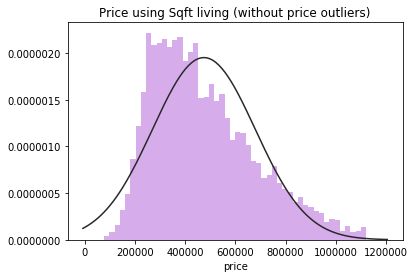

20088 21420


In [13]:
# Remove upper outliers from sqft_lot and create histogram again
norm_price_sqft_living = norm_sqft_living[norm_sqft_living['price'] < limit]

# Histogram (distplot)
sns.distplot(norm_price_sqft_living['price'], color='darkorchid', label=norm_sqft_living, fit=norm, kde=False)
plt.title('Price using Sqft living (without price outliers)')
plt.show()
print(len(norm_price_sqft_living), len(features))

### Model Price to Sqft Living

#### Create the prediction regression model

In [14]:
# Regression Model
X = norm_sqft_living["price"] 
y = norm_sqft_living['sqft_living']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

Text(0.5, 1.0, 'Prediction of Price by Sqft Living')

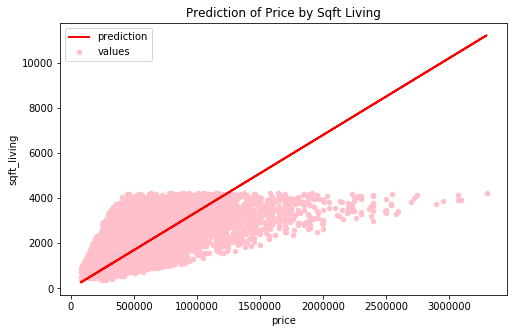

In [15]:
# plot the observed data and the least squares line
norm_sqft_living.plot(kind='scatter', x='price', y='sqft_living', figsize=(8,5), label='values', color='pink') 
plt.plot(X, predictions, c='red', linewidth=2, label='prediction') 
plt.title('Prediction of Price by Sqft Living')
plt.legend()
plt.show()

#### Visual Relationship of Price to Normed Sqft Living

### Price Outliers Removed

### Price vs sqft_living without outliers observations

Comparison with and without outliers
* p-values still 0
* Skew improved from 2.8 to 2
* Kurtosis improved from 26.97 to 13.8
* JB improved from 1146871.98 to 541541.2
* R2 improved from .492 to .393

Still doesn't seem to be a great predictor


In [16]:
mod = ols(formula='price ~ sqft_living', data=norm_sqft_living)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 1.347e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:43:50   Log-Likelihood:            -2.8598e+05
No. Observations:               20841   AIC:                         5.720e+05
Df Residuals:                   20839   BIC:                         5.720e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.916e+04   4262.665     11.534      0.000    4.08e+04    5.75e+04
sqft_living   230.8578      1.989    116.061      0.000     226.959     234.757
==============================================================================
Omnibus:                     9435.328   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88928.171
Skew:                           1.943   Prob(JB):                         0.00
Kurtosis:                      12.344   Cond. No.                     5.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The Price and Sqft_Living data sets are normal

In [17]:
# The shapiro test will confirm the data sets are normal
scs.shapiro(norm_price_sqft_living.price), scs.shapiro(norm_price_sqft_living.sqft_living)

/Users/shirlwilliams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


((0.9523279070854187, 0.0), (0.9710482954978943, 0.0))

#### Notice: Condition warning 
* The Condition number is large indicating numerical problems.
* I will use this study as a base model and continue to add features or change the model to improve its predictive properties.

#### Predictive regression model  with outliers removed for both price and sqft_living

In [18]:
# Regression Model
X = norm_price_sqft_living["price"] 
y = norm_price_sqft_living['sqft_living']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [20]:
mod = ols(formula='price ~ sqft_living', data=norm_price_sqft_living)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                 1.188e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:45:36   Log-Likelihood:            -2.6948e+05
No. Observations:               20088   AIC:                         5.390e+05
Df Residuals:                   20086   BIC:                         5.390e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.42e+05   3260.529     43.554      0.000    1.36e+05    1.48e+05
sqft_living   170.3243      1.563    108.977      0.000     167.261     173.388
==============================================================================
Omnibus:                      917.401   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1046.429
Skew:                           0.550   Prob(JB):                    5.90e-228
Kurtosis:                       3.203   Cond. No.                     5.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Prediction of Price by Sqft Living')

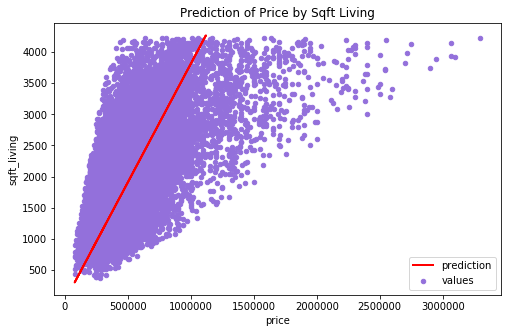

In [21]:
# plot the observed data and the least squares line
norm_sqft_living.plot(kind='scatter', x='price', y='sqft_living', figsize=(8,5), label='values', color='mediumpurple') 
plt.plot(X, predictions, c='red', linewidth=2, label='prediction') 
plt.title('Prediction of Price by Sqft Living')
plt.legend()
plt.show()

### Observations of Price vs Squarefoot Living 
* This model is only a fair predictor as it is cone shaped and loses its predictive value as the price of the homes increases.
* A search should continue to see if a better model can be created.

In [22]:
JB, pval, skew, kurtosis = sms.jarque_bera(res.resid)
rsquared = res.rsquared

summary_stats = "price to sqft_living gives JB: {:.2f}, pval: {:.2f}, skew: {:.2f}, kurtosis: {:.2f}, rsquared: {:.2f}".format(JB,pval,skew,kurtosis,rsquared)
summary_stats        

'price to sqft_living gives JB: 1046.43, pval: 0.00, skew: 0.55, kurtosis: 3.20, rsquared: 0.37'

### price to sqft_living statistics:
JB: 1046.43, pval: 0.00, skew: 0.55, kurtosis: 3.20, rsquared: 0.37

### Outliers Removed - norm_features
Since we had a better predictive model with outliers removed for price and square feet, I will now make it the cleaned version for all future models.

In [23]:
# norm_price_sqft_living will become norm_features
norm_features = norm_price_sqft_living

## Price predicted by grade and sqft_living
Square foot of the living space is always an inportant value when determining the price of a home but will other features help to make a better predictive model? I would like to investigate grade since it had a high correlation initially to price.

In [ ]:
mod = ols(formula='price ~ sqft_living + grade', data=norm_features)
res = mod.fit()
res.summary()

In [ ]:
JB, pval, skew, kurtosis = sms.jarque_bera(res.resid)
rsquared = res.rsquared

summary_stats = "price to sqft_living gives JB: {:.2f}, pval: {:.2f}, skew: {:.2f}, kurtosis: {:.2f}, rsquared: {:.2f}".format(JB,pval,skew,kurtosis,rsquared)
summary_stats 

### Indications are there may be some multicollinearity going on even though p-values look good
Will remove values to see if anything improves

In [ ]:
VIF = 1 / (1 - 0.507)
VIF

The VIF score indicates the selected features are moderately correlated.
There is slight skew and high kurtosis.
The Jarque-Bera value is high indicating there may be some multicollinearity>